In [ ]:
!pip install opendatasets
!pip install kaggle

In [ ]:
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

!cp '/content/drive/My Drive/Colab Notebooks/kaggle.json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import kaggle
kaggle.api.dataset_download_files('jsphyg/weather-dataset-rattle-package', path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


In [ ]:
data = pd.read_csv('./data/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


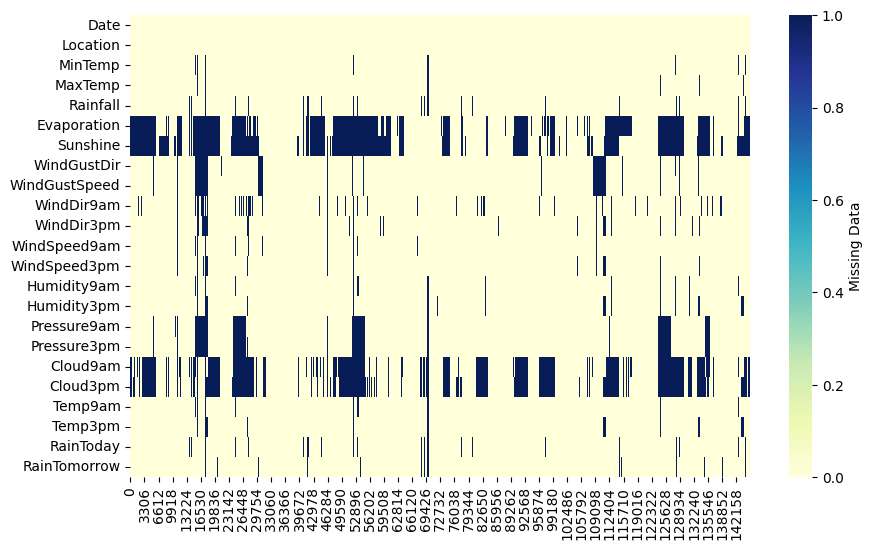

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'});

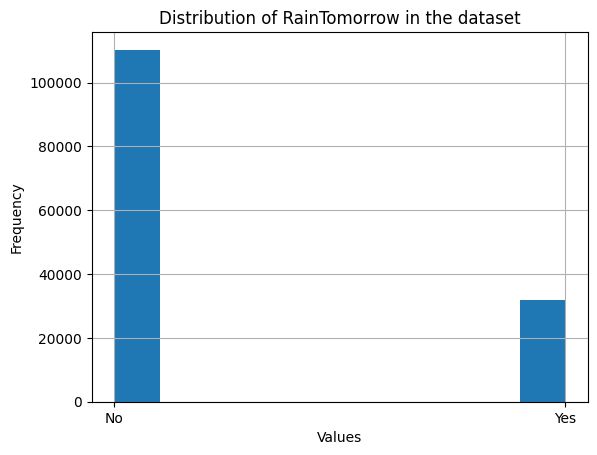

In [ ]:
data['RainTomorrow'].hist()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of RainTomorrow in the dataset')
plt.show()

In [ ]:
#Code below extracted from Kaggle. (https://www.kaggle.com/code/chandrimad31/rainfall-prediction-7-popular-models#Importing-Data)
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
if 'Date' in data.columns:
  data = data.drop('Date',axis = 1)
data = data.dropna()

In [ ]:
# Convert wind directions from letters to degrees where north is 0

def wind_direction_to_degrees(wind_dir):

  # Define the mapping between letters and degrees
  wind_mapping = {
      'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
      'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
      'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
      'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
  }

  # Check if the input is a valid wind direction code
  if wind_dir not in wind_mapping:
    return wind_dir

  # Return the corresponding degrees
  return wind_mapping[wind_dir]

data['WindGustDir'] = data['WindGustDir'].apply(wind_direction_to_degrees)
data['WindDir9am'] = data['WindDir9am'].apply(wind_direction_to_degrees)
data['WindDir3pm'] = data['WindDir3pm'].apply(wind_direction_to_degrees)

data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,Cobar,17.9,35.2,0.0,12.0,12.3,202.5,48.0,67.5,225.0,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0
6050,Cobar,18.4,28.9,0.0,14.8,13.0,180.0,37.0,157.5,157.5,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0
6052,Cobar,19.4,37.6,0.0,10.8,10.6,22.5,46.0,22.5,337.5,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0
6053,Cobar,21.9,38.4,0.0,11.4,12.2,292.5,31.0,292.5,247.5,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0
6054,Cobar,24.2,41.0,0.0,11.2,8.4,292.5,35.0,315.0,292.5,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,67.5,35.0,135.0,45.0,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0.0,0.0
142299,Darwin,21.2,32.6,0.0,7.6,8.6,90.0,37.0,135.0,135.0,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0.0,0.0
142300,Darwin,20.7,32.8,0.0,5.6,11.0,90.0,33.0,90.0,270.0,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0.0,0.0
142301,Darwin,19.5,31.8,0.0,6.2,10.6,112.5,26.0,135.0,337.5,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0.0,0.0


In [ ]:
# We will ask the user to choose one city for which we will make the analysis and predictions.

CITY=""

# Get a list of unique city names from the DataFrame (uppercase for case-insensitive matching)
cities = [city.upper() for city in data['Location'].unique()]

for c in cities:
  print(c)
print('\n')

# Loop until a valid city is selected
while True:
  city = input("Enter a city from the list or a * to select them all \t").upper()
  if city == '*':
    exists = False
    break
  if city in cities:
    CITY = city
    exists = True
    break
  else:
    # Provide more specific error message with suggestions
    print(f"City '{city}' not found. Please select from the list ({', '.join(cities)}) or enter 'q' to quit.")

# Print the selected city (or a message if user quits)
if exists:
  print(f"You selected: {CITY}")
else:
    print("No city selected. All cities will be considered in the model.")

COBAR
COFFSHARBOUR
MOREE
NORFOLKISLAND
SYDNEY
SYDNEYAIRPORT
WAGGAWAGGA
WILLIAMTOWN
CANBERRA
SALE
MELBOURNEAIRPORT
MELBOURNE
MILDURA
PORTLAND
WATSONIA
BRISBANE
CAIRNS
TOWNSVILLE
MOUNTGAMBIER
NURIOOTPA
WOOMERA
PERTHAIRPORT
PERTH
HOBART
ALICESPRINGS
DARWIN


Enter a city from the list or a * to select them all 	perth
You selected: PERTH


In [ ]:
# Select only the data needed for the city specified by the user

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

if exists:
  data = data[data['Location'].str.upper() == CITY]

data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
120639,Perth,6.4,20.7,0.0,1.8,7.0,45.0,22.0,112.5,67.5,...,80.0,39.0,1024.1,1019.0,0.0,6.0,11.1,19.7,0.0,0.0
120641,Perth,9.5,19.2,1.8,1.2,4.7,270.0,26.0,22.5,337.5,...,93.0,73.0,1019.3,1018.4,6.0,6.0,13.2,17.7,1.0,1.0
120642,Perth,9.5,16.4,1.8,1.4,4.9,247.5,44.0,270.0,225.0,...,69.0,57.0,1020.4,1022.1,7.0,5.0,15.9,16.0,1.0,1.0
120643,Perth,0.7,15.9,6.8,2.4,9.3,22.5,24.0,67.5,45.0,...,86.0,41.0,1032.0,1029.6,0.0,1.0,6.9,15.5,1.0,0.0
120644,Perth,0.7,18.3,0.0,0.8,9.3,0.0,37.0,45.0,22.5,...,72.0,36.0,1028.9,1024.2,1.0,5.0,8.7,17.9,0.0,0.0


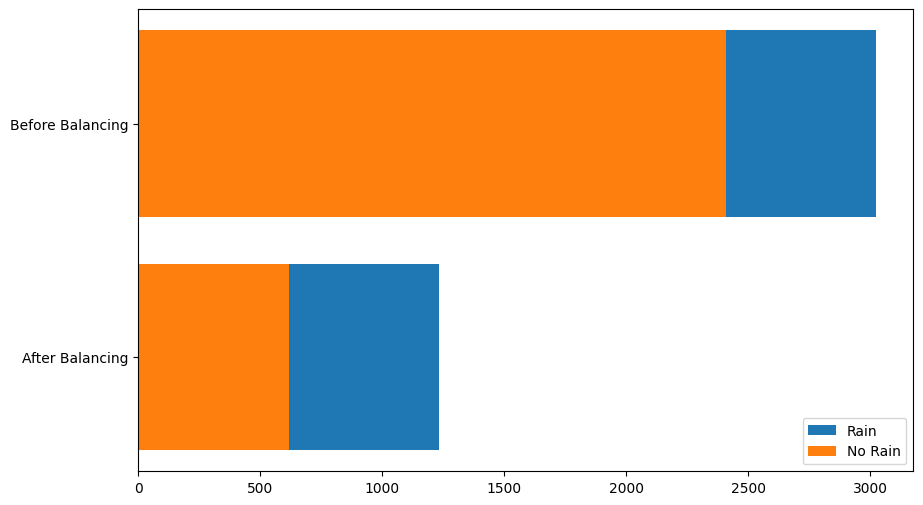

In [ ]:
#Code below also copied from Kaggle. This code is resampling data to make it more balanced.

from sklearn.utils import resample
no = data[data.RainTomorrow == 0]
yes = data[data.RainTomorrow == 1]
no_balanced = resample(no, replace=True, n_samples=len(yes), random_state=420)
balanced = pd.concat([yes, no_balanced])

labels = ["After Balancing", "Before Balancing"]
rain = [len(yes), len(yes)]
norain = [len(no_balanced), len(no)]


plt.figure(figsize=(10, 6))
plt.barh(labels, rain, label='Rain', left=norain)
plt.barh(labels, norain, label='No Rain')

plt.legend()

plt.show()

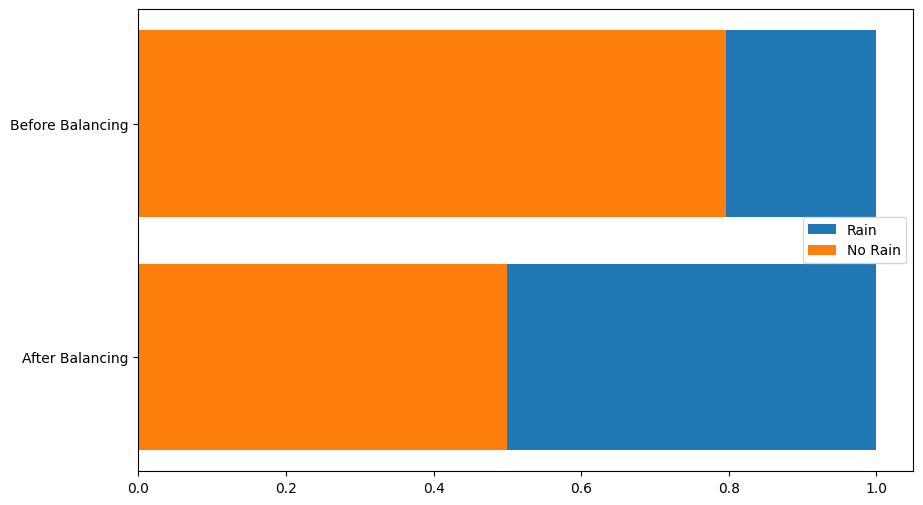

In [ ]:
labels = ["After Balancing", "Before Balancing"]
rain = [len(yes)/len(balanced), len(yes)/len(data)]
norain = [len(no_balanced)/len(balanced), len(no)/len(data)]


plt.figure(figsize=(10, 6))
plt.barh(labels, rain, label='Rain', left=norain)
plt.barh(labels, norain, label='No Rain')

plt.legend()

plt.show()

In [ ]:
# Normalize the data

X = balanced.drop('RainTomorrow', axis=1).drop('Location', axis=1)
y = balanced['RainTomorrow']

X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
120641,-0.662465,-0.763890,-0.176787,-1.141248,-0.750926,0.772544,-1.013690,-1.018404,1.433477,-0.032898,-1.731215,1.508327,1.084401,0.466851,0.714467,0.704963,0.645199,-0.926690,-0.740103,1.458391
120642,-0.662465,-1.247371,-0.176787,-1.079783,-0.697679,0.538693,0.673207,1.495972,0.148334,0.391508,0.422988,0.141667,0.216739,0.634079,1.321484,1.063261,0.269367,-0.387841,-1.040418,1.458391
120645,-1.992983,-0.556684,-0.418311,-1.079783,-0.165208,1.474098,-1.201123,-0.789824,-2.421952,-0.457305,-0.360358,-0.484719,-0.596694,1.166171,1.157425,0.704963,0.269367,-1.525412,-0.457455,-0.685687
120647,-0.303436,-0.556684,0.198918,-0.649526,-1.549632,1.474098,0.860640,-0.789824,-2.164923,1.664728,-0.752032,0.711109,-0.162863,0.603674,-0.007391,1.063261,1.021031,-0.886775,-0.510451,1.458391
120648,0.161189,-1.126501,-0.069443,-0.710991,-0.884044,0.304842,1.610371,1.038813,0.148334,3.150151,-0.360358,-0.199998,1.301317,-0.232469,0.189480,-0.011633,1.021031,-0.487628,-1.252404,1.458391


In [ ]:
# Divide in training and tesing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
# Implement KNN algorithm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def crossv (classif_metric, X_train, y_train, k_values, cv):
  # Instantiate the grid
  param_grid = {'n_neighbors': k_values}

  clf = KNeighborsClassifier()
  grid = GridSearchCV(clf, param_grid, cv=cv, scoring=classif_metric)

  # Fit the grid with data
  grid.fit(X_train, y_train)
  return grid

The optimal k is 26


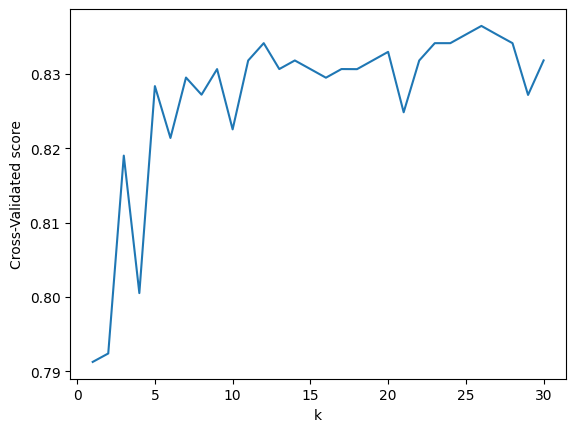

In [ ]:
# Get best K value of K nearest neighbours

k_values = list(range(1, 31))
grid = crossv ('accuracy', X_train, y_train, k_values, cv=5)
optimal_k =grid.best_params_['n_neighbors']
print(f"The optimal k is {optimal_k}")

cv_scores = grid.cv_results_['mean_test_score']
# Plot accuracy against k
plt.plot(k_values, cv_scores)
plt.xlabel('k')
plt.ylabel('Cross-Validated score')
plt.show()

In [ ]:
# get predictions
best_clf = grid.best_estimator_
y_pred = best_clf.predict(X_test)



Accuracy.........: 85.1351
Precision........: 91.0714
Recall...........: 79.2746
FP Rate..........: 8.4746
ROC AUC (probs)..: 0.9289
F1 measure.......: 0.8476


Confusion Matrix


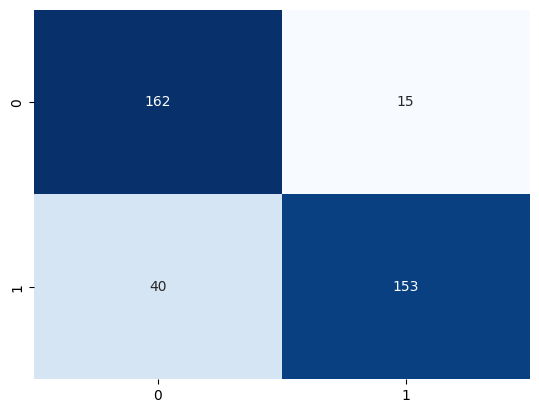

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix,roc_curve, auc

# Report the predctive performance metrics
# evaluate predictions

# get probabilities for positive class (colunm 1 of array)
probs = best_clf.predict_proba(X_test)[:,1]
probs

accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity=recall_score(y_test, y_pred, pos_label=0)
roc = roc_auc_score(y_test, probs)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision *100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate..........: {(1-specificity) * 100:.4f}")
print(f"ROC AUC (probs)..: {roc :.4f}")
print(f"F1 measure.......: {f1 :.4f}")

cm = confusion_matrix(y_test, y_pred)

print("\n\nConfusion Matrix")

sns.heatmap(cm, annot=True,fmt='d',cbar=False, cmap='Blues');

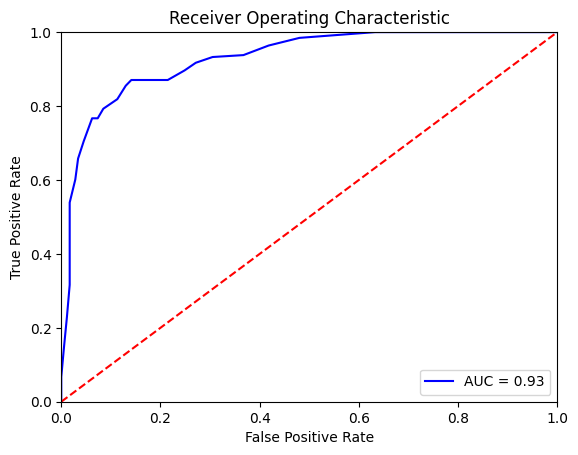

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

roc_df = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': threshold})
roc_df

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROCcuve.png')
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB

NBclf = GaussianNB()
NBclf.fit(X_train,y_train)

GaussianNB()

In [ ]:
df_means = pd.DataFrame(data= NBclf.theta_, columns = X.columns )
df_means.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.083976,0.409452,-0.300391,0.361640,0.618457,-0.246493,-0.318181,-0.07701,-0.242771,-0.052717,-0.063258,-0.386136,-0.545553,0.364727,0.330107,-0.468687,-0.531096,0.272299,0.454917,-0.363343
1,-0.098484,-0.430344,0.306452,-0.394656,-0.605976,0.290468,0.353286,0.10342,0.223073,0.062418,0.091501,0.432176,0.564163,-0.334862,-0.283304,0.453392,0.521698,-0.287724,-0.465431,0.383817


In [ ]:
df_stdev = pd.DataFrame(data= np.sqrt(NBclf.var_), columns = X.columns )
df_stdev.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1.117599,1.048698,0.378664,1.038862,0.754379,0.860264,0.719294,0.742956,0.837916,0.948849,0.92347,0.904035,0.743123,1.026564,1.046994,0.934397,0.952141,1.091000,1.021297,0.766306
1,0.894068,0.739691,1.337241,0.775404,0.816410,1.030271,1.155743,1.208887,1.086982,1.072476,1.05242,0.891969,0.911154,0.872941,0.854224,0.836658,0.757268,0.822642,0.737229,1.072036


In [ ]:
# get predictions
y_pred = NBclf.predict(X_test)

probs = NBclf.predict_proba(X_test)[:,1]
probs[:5]

array([1.        , 0.4579806 , 0.99999667, 0.98954376, 0.13654754])



Accuracy.........: 83.7838
Precision........: 84.8168
Recall...........: 83.9378
FP Rate...........:16.3842
ROC AUC (probs)..: 90.0837
F1 measure.......: 0.8476
Confusion matrix.:
 [[148  29]
 [ 31 162]]


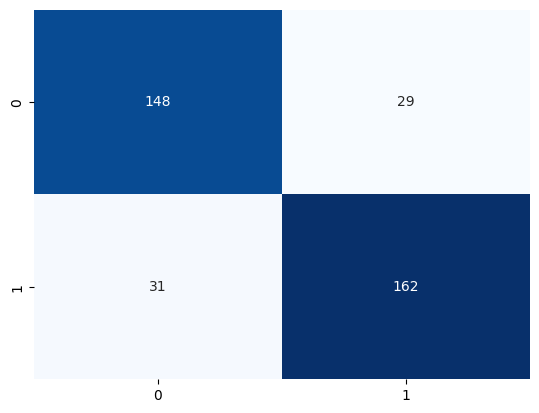

In [ ]:
# Report the predctive performance metrics
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
specificity=recall_score(y_test, y_pred, pos_label=0)
roc = roc_auc_score(y_test, probs)

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision *100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate...........:{(1-specificity) * 100:.4f}")
print(f"ROC AUC (probs)..: {roc * 100:.4f}")
print(f"F1 measure.......: {f1 :.4f}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix.:\n {cm}")

sns.heatmap(cm, annot=True, fmt='d',cbar=False, cmap='Blues');

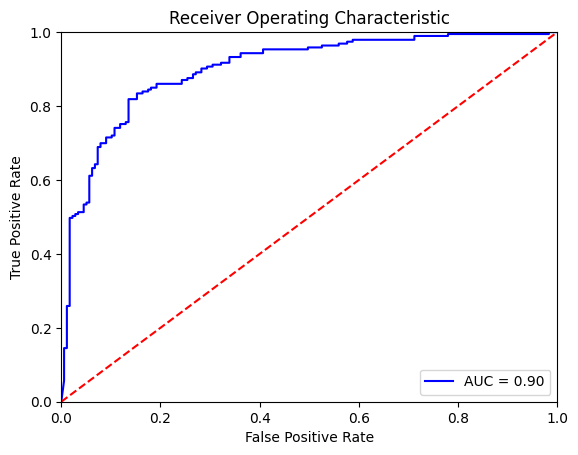

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

roc_df = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': threshold})
roc_df

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROCcuve.png')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
probs_train = rf.predict_proba(X_train)[:,1]
probs_test =rf.predict_proba(X_test)[:,1]

# predict class membershio
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)



Accuracy.........: 87.5676
Precision........: 88.0829
Recall...........: 88.0829
FP Rate..........: 11.9171
ROC AUC (probs)..: 0.9552
F1 measure.......: 0.8808
Confusion matrix.:
 [[154  23]
 [ 23 170]]


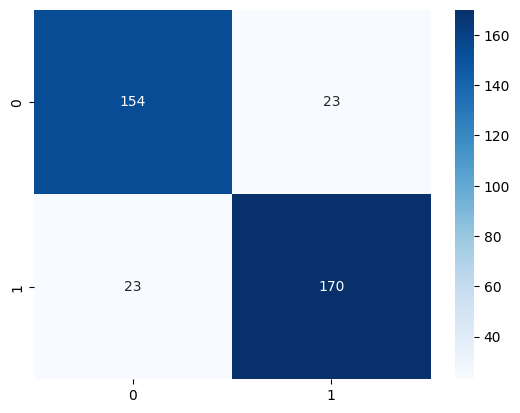

In [ ]:
# Report the predctive performance metrics
# evaluate predictions
accuracy = accuracy_score(y_test, y_test_pred)
precision=precision_score(y_test, y_test_pred, pos_label=1)
recall=recall_score(y_test, y_test_pred, pos_label=1)
f1 = f1_score(y_test, y_test_pred, pos_label=1)
specificity=recall_score(y_test, y_test_pred, pos_label=1)
roc = roc_auc_score(y_test, probs_test )

print("\n")
print(f"Accuracy.........: {accuracy * 100.0:.4f}")
print(f"Precision........: {precision *100:.4f}")
print(f"Recall...........: {recall * 100:.4f}")
print(f"FP Rate..........: {(1-specificity) * 100:.4f}")
print(f"ROC AUC (probs)..: {roc :.4f}")
print(f"F1 measure.......: {f1 :.4f}")

cm = confusion_matrix(y_test, y_test_pred)
print(f"Confusion matrix.:\n {cm}")

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues");

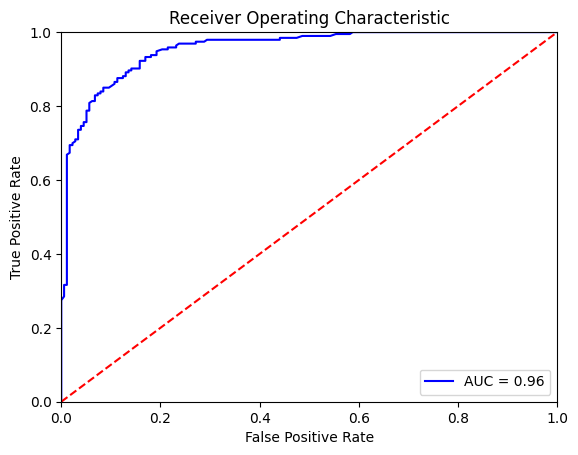

In [ ]:
probs = rf.predict_proba(X_test)[:,1]
probs[:10]

fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

roc_df = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': threshold})
roc_df

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROCcuve.png')
plt.show()

In [ ]:
features = data.drop("RainTomorrow", axis=1).drop("Location", axis=1)
features = scaler.fit_transform(features)
target = data["RainTomorrow"]

In [ ]:
# Build the LSTM model

from tensorflow import keras
from keras import *
from keras.losses import MeanSquaredError
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError

# Define window size
window_size = 1  # One day of data for each prediction

# Create sequences
sequences = []
targets = []
for i in range(window_size, len(data)):
    sequence = features[i - window_size:i, :]
    sequences.append(sequence)
    target_value = target.iloc[i]
    targets.append(target_value)

# Convert sequences and targets to NumPy arrays
sequences = np.array(sequences)
targets = np.array(targets)

In [ ]:
# Build LSTM model
lstm = keras.Sequential()
lstm.add(keras.layers.LSTM(units=32, return_sequences=True, input_shape=(window_size, features.shape[1])))
lstm.add(keras.layers.LSTM(units=64, activation="sigmoid", return_sequences=True))
lstm.add(keras.layers.LSTM(units=32, activation="sigmoid"))
lstm.add(keras.layers.Dense(units=1, activation="sigmoid"))

lstm.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
lstm.fit(sequences, targets, epochs=10, batch_size=15)

# Evaluate the model
loss, accuracy = lstm.evaluate(sequences, targets)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/10
202/202 [==============================] - 9s 5ms/step - loss: 0.4915 - accuracy: 0.7963
Epoch 2/10
202/202 [==============================] - 1s 5ms/step - loss: 0.4328 - accuracy: 0.7956
Epoch 3/10
202/202 [==============================] - 1s 5ms/step - loss: 0.4073 - accuracy: 0.8148
Epoch 4/10
202/202 [==============================] - 1s 5ms/step - loss: 0.3927 - accuracy: 0.8211
Epoch 5/10
202/202 [==============================] - 1s 5ms/step - loss: 0.3849 - accuracy: 0.8261
Epoch 6/10
202/202 [==============================] - 1s 5ms/step - loss: 0.3790 - accuracy: 0.8264
Epoch 7/10
202/202 [==============================] - 1s 5ms/step - loss: 0.3729 - accuracy: 0.8320
Epoch 8/10
202/202 [==============================] - 1s 5ms/step - loss: 0.3717 - accuracy: 0.8313
Epoch 9/10
202/202 [==============================] - 1s 6ms/step - loss: 0.3660 - accuracy: 0.8366
Epoch 10/10
95/95 [==============================] - 1s 3ms/step - loss: 0.3573 - accuracy: 0.8423
T

95/95 [==============================] - 1s 3ms/step
Confusion Matrix:



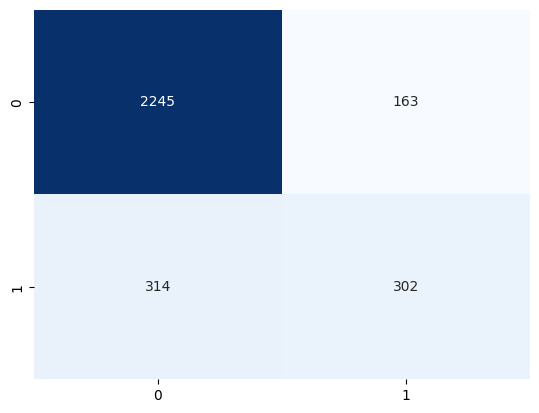

In [ ]:
# Get predictions from the trained model
y_pred = lstm.predict(sequences)

# Binarize predictions (assuming your target is binary)
y_pred = np.round(y_pred)

# Calculate confusion matrix
cm = confusion_matrix(targets, y_pred)

# Print confusion matrix
print("Confusion Matrix:\n")
sns.heatmap(cm, annot=True,fmt='d',cbar=False, cmap = 'Blues');

In [ ]:
probs = lstm.predict_proba(X_test)[:,1]
probs[:10]

fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

roc_df = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': threshold})
roc_df

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(targets, y_pred)
roc_auc = auc(fpr, tpr)

# Print ROC AUC score
print("ROC AUC Score:", roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROCcuve.png')
plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_proba'